# PULSAR CLASSIFICATION PROJECT!
## DSCI 100 007
### Group 36
#### Ruirui Ma, Emilio Rodriguez-Sanin, William Tan, Jinay Borana


In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Set Up

In [2]:
# RUN ME TO DOWNLOAD THE NEEDED FILE FOR ANALYSIS
download.file("https://archive.ics.uci.edu/static/public/372/htru2.zip", destfile = "./htru.zip")
unzip("./htru.zip", exdir = "data/") #unzip the zip to data folder

### Reading Data

In [3]:
pulsar_data = read_csv("data/HTRU_2.csv", col_names=c("Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis", "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis", "class")) |>
              mutate(class = as.factor(class))
pulsar_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Profile_mean, Profile_stdev, Profile_skewness, Profile_kurtosis, DM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     140.5625     55.68378      -0.2345714       -0.6996484       3.199833  
2     102.5078     58.88243       0.4653182       -0.5150879       1.677258  
3     103.0156     39.34165       0.3233284        1.0511644       3.121237  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
17896 119.3359     59.93594      0.1593631        -0.74302540       21.430602
17897 114.5078     53.90240      0.2011614        -0.02478884        1.946488
17898  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     14.86015 10.576487   127.39358   0    
3     21.74467  7.735822    63.17191   0    
⋮     ⋮        ⋮           ⋮           ⋮    
17896 58.87200  2.499517     4.595173  0    
17897 13.38173 10.007967   134.238910  0    
17898 64.71256 -1.597527     1.429475  0

In [4]:
set.seed(22) 
#initial_split of data
pulsar_split = initial_split(pulsar_data, prop = .75, strata = class)
pulsar_training = training(pulsar_split)
pulsar_testing = testing(pulsar_split)

pulsar_training
pulsar_testing

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean  
1     140.5625     55.68378      -0.2345714       -0.6996484       3.199833 
2     102.5078     58.88243       0.4653182       -0.5150879       1.677258 
3     103.0156     39.34165       0.3233284        1.0511644       3.121237 
⋮     ⋮            ⋮             ⋮                ⋮                ⋮        
13421 122.5547     49.48561      0.1279781         0.32306090      16.409699
13422 119.3359     59.93594      0.1593631        -0.74302540      21.430602
13423 114.5078     53.90240      0.2011614        -0.02478884       1.946488
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     14.86015 10.576487   127.39358   0    
3     21.74467  7.735822    63.17191   0    
⋮     ⋮        ⋮           ⋮           ⋮    
13421 44.62689  2.945244     8.297092  0    
13422 58.87200  2.499517     4.595173  0    
13423 13.38173 10.007967   134.238910  0

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean    
1    107.2500     52.62708       0.4526880        0.1703474        2.331940  
2    107.2578     39.49649       0.4658820        1.1628771        4.079431  
3    134.9609     49.55433      -0.1353038       -0.0804696       10.696488  
⋮    ⋮            ⋮             ⋮                ⋮                ⋮          
4473 118.4844     50.60848      -0.02905883      -0.02749376        0.4222408
4474 136.4297     59.84742      -0.18784558      -0.73812297        1.2968227
4475  57.0625     85.79734       1.40639105       0.08951971      188.3060201
     DM_stdev  DM_skewness DM_kurtosis class
1    14.48685  9.001004    107.97251   0    
2    24.98042  7.397080     57.78474   0    
3    41.34204  3.893934     14.13121   0    
⋮    ⋮         ⋮           ⋮           ⋮    
4473  8.086684 27.446113   830.638550  0    
4474 12.166062 15.450260   285.931022  0    
4475 64.712562 -1.597527     1.429475  0

## Preliminary Exploratory Data

In [5]:
pulsar_summary  = pulsar_training |>
                  group_by(class) |>
                  summarize(count = n())
pulsar_summary

class count
1 0     12210
2 1      1213

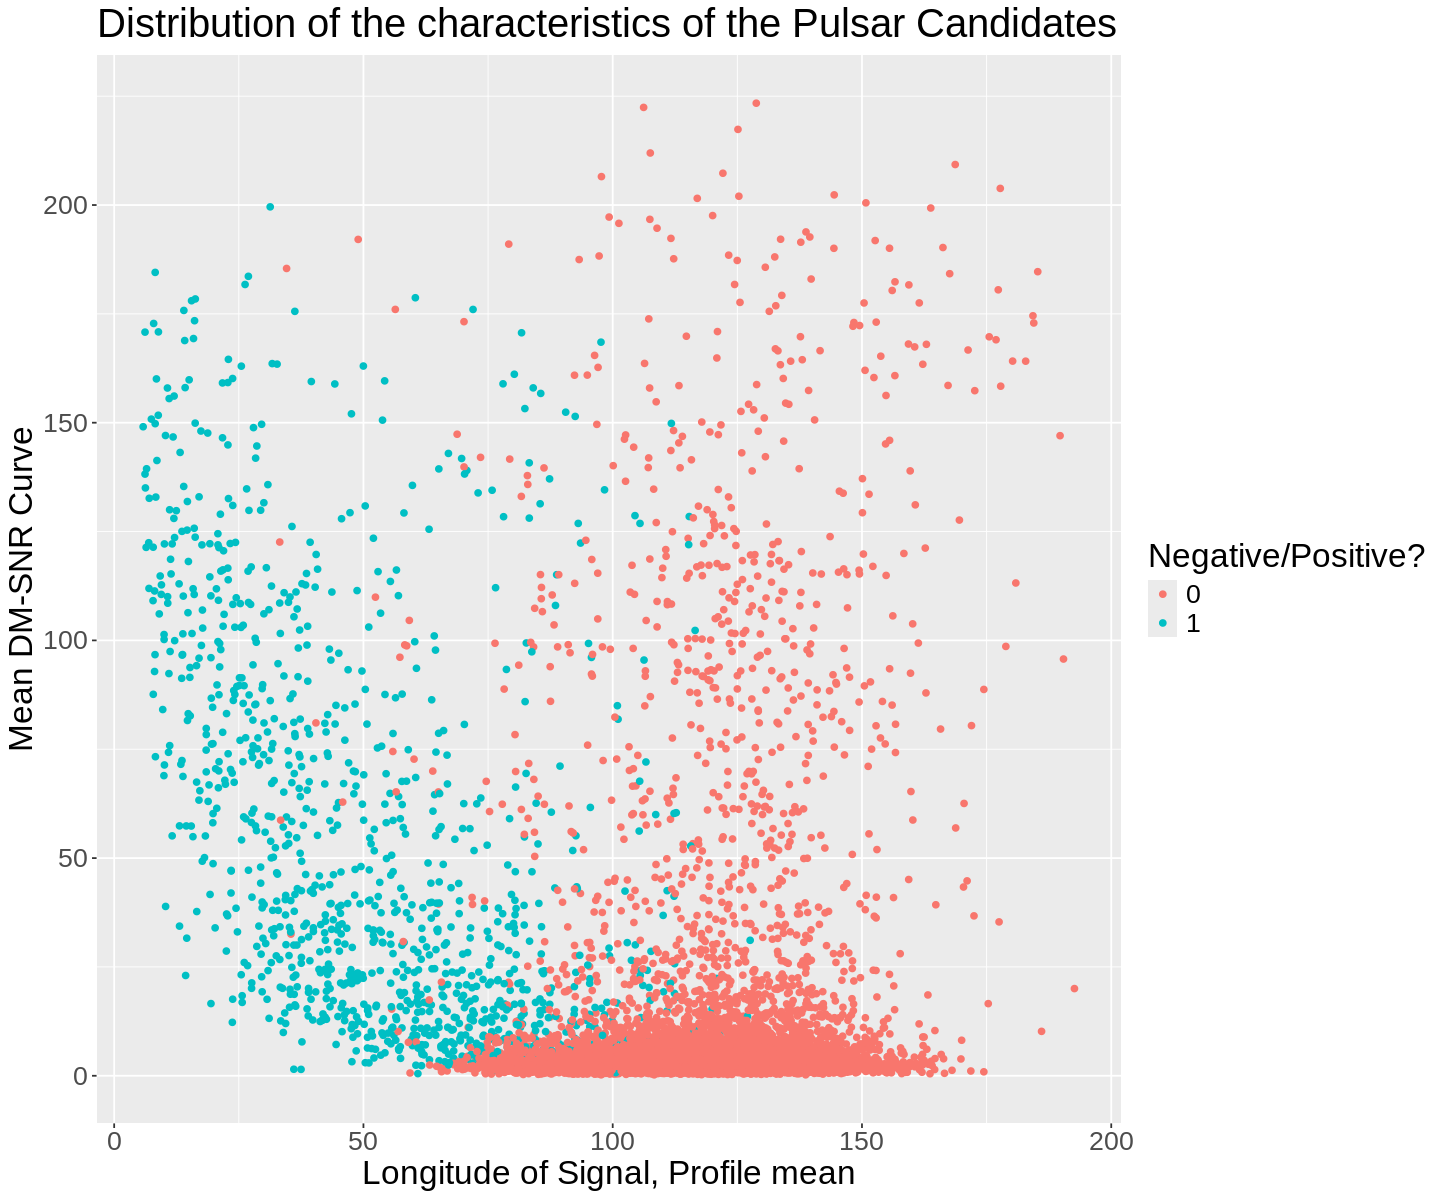

In [6]:
options(repr.plot.width = 12, repr.plot.height = 10)

pulsar_prelim_graph = pulsar_training |>
                      ggplot(aes(x=Profile_mean, y=DM_mean, color = class))+
                      geom_point()  +
                      labs(x= "Longitude of Signal, Profile mean", y = "Mean DM-SNR Curve", color = "Negative/Positive?")+
                      ggtitle("Distribution of the characteristics of the Pulsar Candidates") +
                      theme(text = element_text(size = 20))
pulsar_prelim_graph

In [7]:
#Save Image to a JPG file
ggsave("prelim_graph.jpg",pulsar_prelim_graph, width = 12, height =10)

## Modelling data

- We will first tune for k for knn classification (using 5 cross validation folds), we will be trying for k = 2:10
  - we will tuning for accuracy as tuning for either recall or precision means little
- Then we will used the tune k to create our final model
- Finally, we will collect the metrics of our model

### Training tuning model

In [8]:
k_candidates = 2:10

pulsar_spec_tune = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                   set_engine("kknn") |>
                   set_mode("classification")

pulsar_recipe = recipe(class ~ . , data = pulsar_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

train_vfold = pulsar_training |> 
              vfold_cv(v= 5, strata = class)

pulsar_workflow = workflow() |>
                  add_model(pulsar_spec_tune) |>
                  add_recipe(pulsar_recipe)

pulsar_tune_fit = pulsar_workflow |>
                  tune_grid(resamples = train_vfold, grid = tibble(neighbors = 2:10))

### collecting metrics for best neighbors

neighbors .metric  .estimator mean      n std_err      .config             
1 2         accuracy binary     0.9710942 5 0.001205879  Preprocessor1_Model1
2 3         accuracy binary     0.9787676 5 0.000541202  Preprocessor1_Model2
3 4         accuracy binary     0.9787676 5 0.000541202  Preprocessor1_Model3
⋮ ⋮         ⋮        ⋮          ⋮         ⋮ ⋮            ⋮                   
7  8        accuracy binary     0.9794382 5 0.0008694971 Preprocessor1_Model7
8  9        accuracy binary     0.9789167 5 0.0005730331 Preprocessor1_Model8
9 10        accuracy binary     0.9789167 5 0.0005730331 Preprocessor1_Model9

[1] 7 8

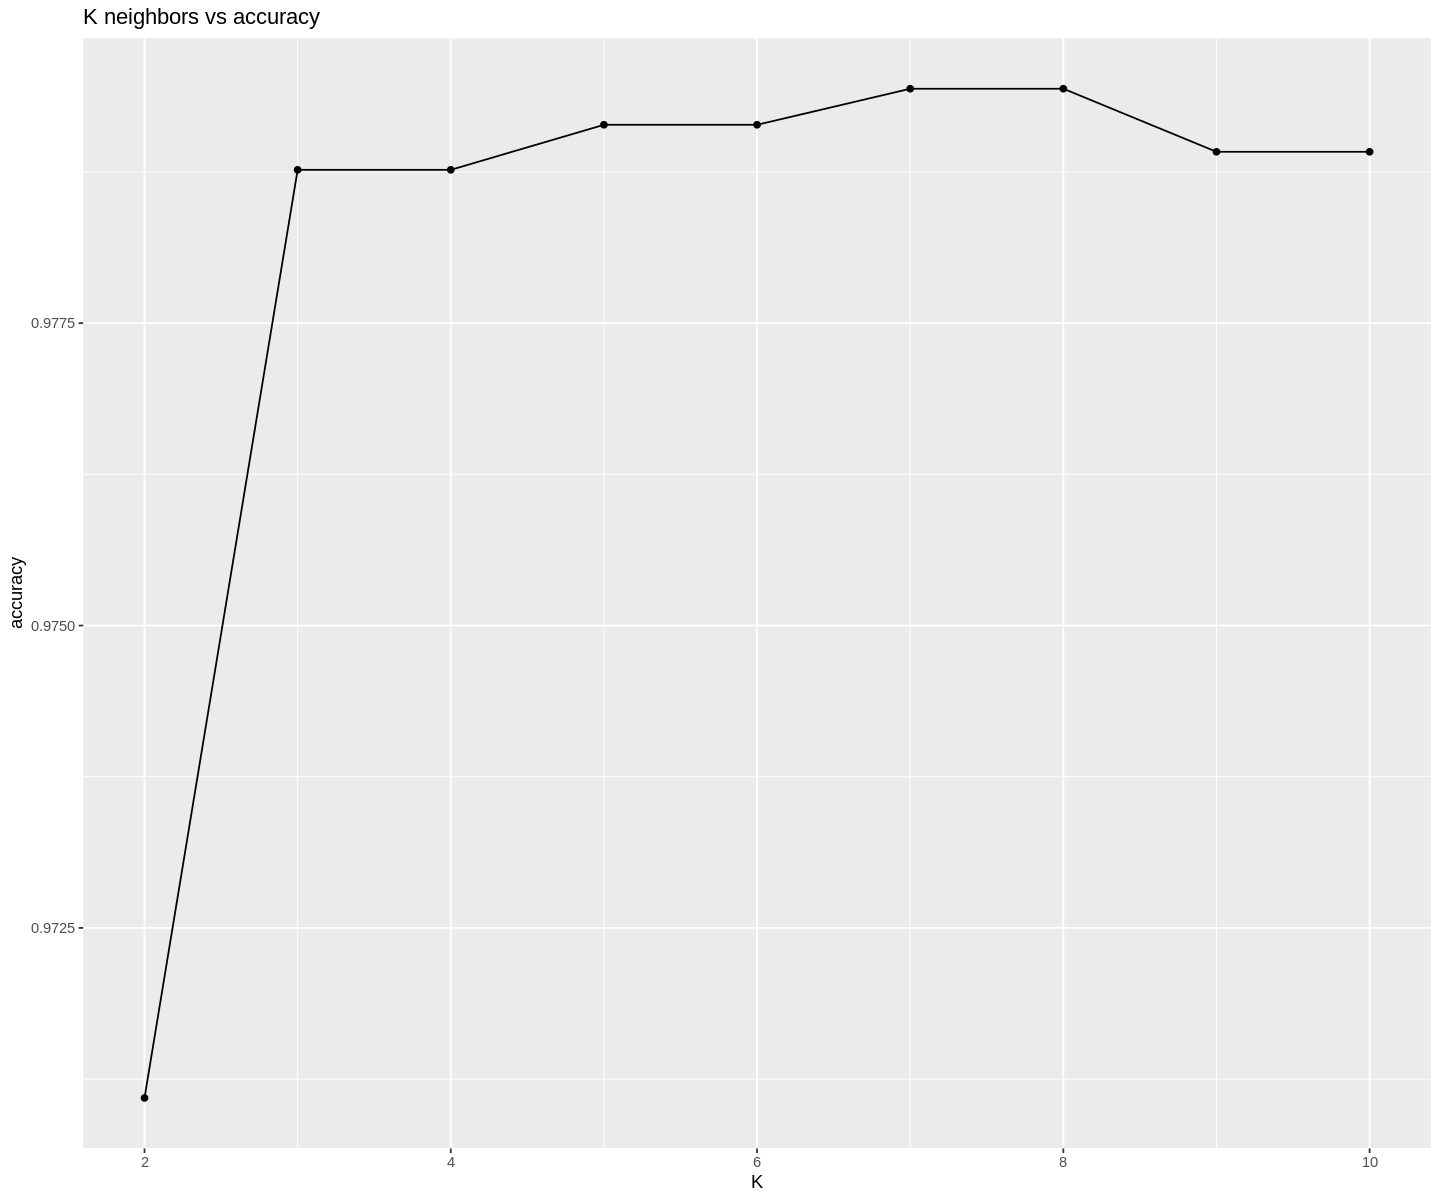

In [9]:
metrics = pulsar_tune_fit |>
          collect_metrics() |>
          filter(.metric == "accuracy")  
metrics
cross_val_plot = ggplot(metrics, aes(x = neighbors, y = mean))+
                 geom_point() +
                 geom_line() +
                 xlab("K")+
                 ylab("accuracy") + 
                 ggtitle("K neighbors vs accuracy")
cross_val_plot

best_neighbors = metrics |>
                 slice_max(mean, n=1) |>
                 pull(neighbors)

best_neighbors

- As shown in the graph above, K value of 7 and 8 have equal mean accuracy. We will choose the lower k, K = 7

## Training of final classification model

### k = 7

In [10]:
best_k = 7

pulsar_spec = nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")

pulsar_recipe = recipe(class ~ . , data = pulsar_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

pulsar_workflow = workflow() |>
                  add_model(pulsar_spec) |>
                  add_recipe(pulsar_recipe)

pulsar_fit = pulsar_workflow |>
             fit(pulsar_training)

#### collecting metrics of model when tested against testing data

In [11]:
pulsar_pred = pulsar_fit |>
              predict(pulsar_testing)|>
              bind_cols(pulsar_testing)
pulsar_pred
metrics = pulsar_pred |>
          metrics(truth = class, estimate = .pred_class)
metrics

pulsar_conf_mat = pulsar_pred |>
                  conf_mat(truth = class, estimate = .pred_class)

pulsar_conf_mat
conf_positives = tidy(pulsar_conf_mat) |>
                 filter(grepl("cell_[12]_2", name))|>
                 pull(value)   
predicted_positives = tidy(pulsar_conf_mat) |>
                      filter(grepl("cell_2_[12]", name))|>
                      pull(value)
precision = predicted_positives[2]/sum(predicted_positives)
recall = conf_positives[2]/sum(conf_positives)
print(sprintf("the precision of k = %d is %f", best_k, precision))     
print(sprintf("the recall of k =%d is %f", best_k, recall))    

                

.pred_class Profile_mean Profile_stdev Profile_skewness Profile_kurtosis
1    0           107.2500     52.62708       0.4526880        0.1703474      
2    0           107.2578     39.49649       0.4658820        1.1628771      
3    0           134.9609     49.55433      -0.1353038       -0.0804696      
⋮    ⋮           ⋮            ⋮             ⋮                ⋮               
4473 0           118.4844     50.60848      -0.02905883      -0.02749376     
4474 0           136.4297     59.84742      -0.18784558      -0.73812297     
4475 0            57.0625     85.79734       1.40639105       0.08951971     
     DM_mean     DM_stdev  DM_skewness DM_kurtosis class
1     2.331940   14.48685  9.001004    107.97251   0    
2     4.079431   24.98042  7.397080     57.78474   0    
3    10.696488   41.34204  3.893934     14.13121   0    
⋮    ⋮           ⋮         ⋮           ⋮           ⋮    
4473   0.4222408  8.086684 27.446113   830.638550  0    
4474   1.2968227 12.166062 15.450260   285.931022  0    
4475 188.3060201 64.712562 -1.597527     1.429475  0

.metric  .estimator .estimate
1 accuracy binary     0.9767598
2 kap      binary     0.8566615

          Truth
Prediction    0    1
         0 4025   80
         1   24  346

[1] "the precision of k = 7 is 0.935135"
[1] "the recall of k =7 is 0.812207"
